# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [74]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df=pd.merge(study_results,mouse_metadata,how="left",on="Mouse ID")

df.head()

# Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
df["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

df_dupli=df[df.duplicated()]
df_dupli


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
df.sort_values(by=["Mouse ID","Timepoint"])

df.loc[df["Mouse ID"]=="g989"]





,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df=df.loc[df["Mouse ID"]!="g989"]
df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

df_group=df.groupby(["Drug Regimen"])


tumor_mean=df_group.mean()
tumor_volume_mean=tumor_mean["Tumor Volume (mm3)"]
tumor_volume_mean=tumor_volume_mean.rename("Mean Tumor Volume")
tumor_median=df_group.median()
tumor_volume_median=tumor_median["Tumor Volume (mm3)"]
tumor_volume_median=tumor_volume_median.rename("Median Tumor Volume")
tumor_variance=df_group.var()
tumor_volume_variance=tumor_variance["Tumor Volume (mm3)"]
tumor_volume_variance=tumor_volume_variance.rename("Tumor Volume Variance")
tumor_deviation=df_group.std()
tumor_volume_deviation=tumor_deviation["Tumor Volume (mm3)"]
tumor_volume_deviation=tumor_volume_deviation.rename("Tumor Volume Std. Dev.")
tumor_sem=df_group.sem()
tumor_volume_sem=tumor_sem["Tumor Volume (mm3)"]
tumor_volume_sem=tumor_volume_sem.rename("Tumor Volume Std. Err.")

assem_df=pd.concat([tumor_volume_mean,tumor_volume_median,tumor_volume_variance,tumor_volume_deviation,tumor_volume_sem],axis=1)


assem_df=assem_df.rename(columns={"Tumor Volume (mm3)":"Mean"})
assem_df




# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


C:\Users\tedta\AppData\Local\Temp\ipykernel_15132\2598737226.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_mean=df_group.mean()
C:\Users\tedta\AppData\Local\Temp\ipykernel_15132\2598737226.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_median=df_group.median()
C:\Users\tedta\AppData\Local\Temp\ipykernel_15132\2598737226.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tumor_variance=df_gro

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
df.groupby(['Drug Regimen']).agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]

C:\Users\tedta\AppData\Local\Temp\ipykernel_15132\2152112867.py:5: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby(['Drug Regimen']).agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


<Axes: xlabel='Drug Regimen', ylabel='# of observed Mouse Timepoints'>

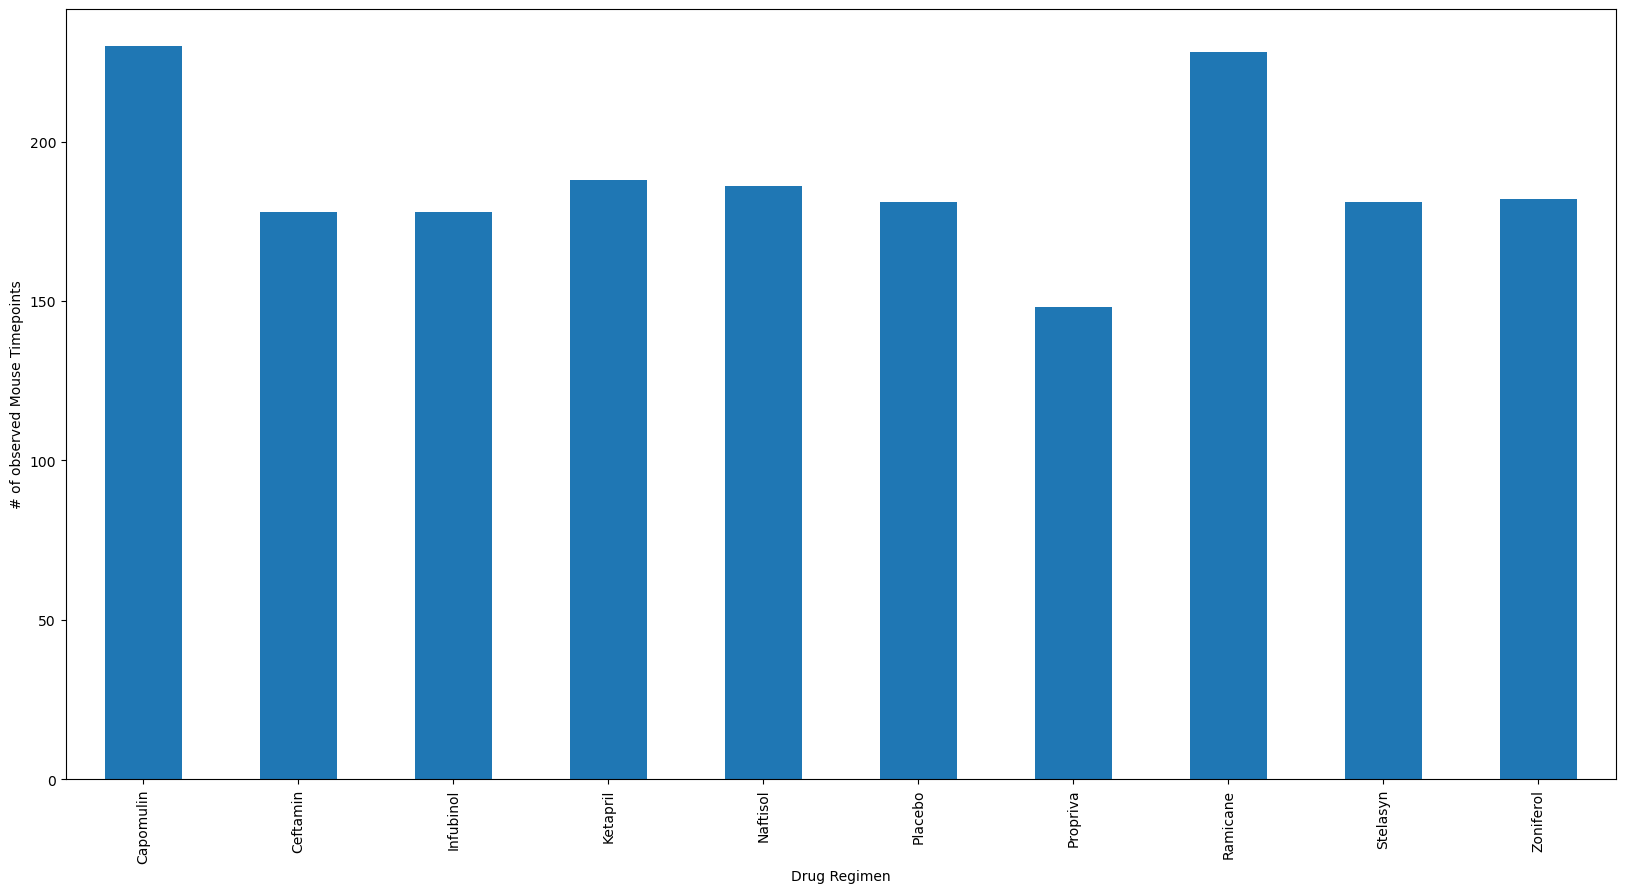

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
df_new=df.groupby(["Drug Regimen"]).count()["Mouse ID"]
print(df_new)
df_new.plot(kind="bar",x=df_new.index,y="Mouse ID",xlabel="Drug Regimen",ylabel="# of observed Mouse Timepoints",figsize=(20,10))



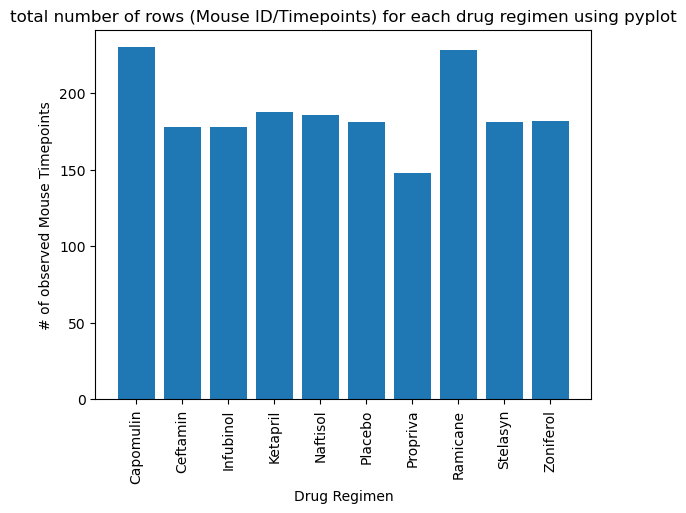

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

plt.bar(x=df_new.index,height=df_new,align="center",label="Drug")


plt.title("total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot")
plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse Timepoints")

plt.show()

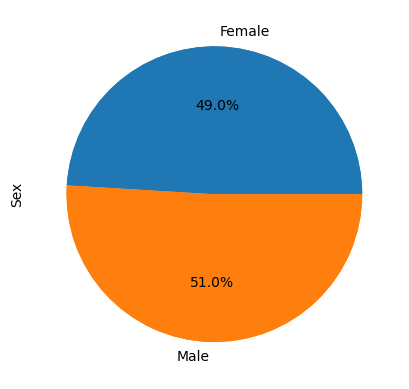

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_group=df.groupby("Sex").count()["Mouse ID"]
pie_group=pie_group.rename("Sex")

pie_group.plot(kind="pie",x=pie_group.index,y="Mouse ID")
plt.pie(x=pie_group,autopct="%1.1f%%")
plt.show()


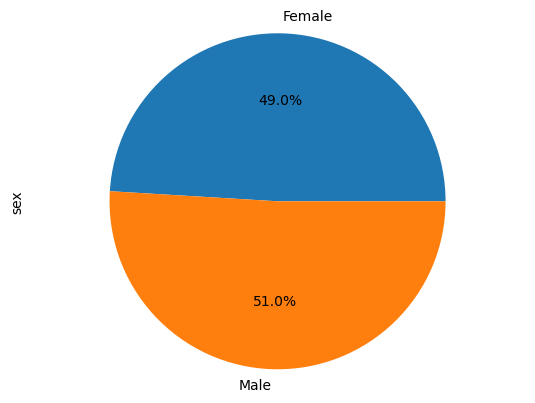

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)


plt.pie(x=pie_group,autopct="%1.1f%%",pctdistance=.6,labels=["Female","Male"])
plt.axis("equal")
plt.ylabel('sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

final_volume=df.groupby(["Drug Regimen"]).max()
final_volume=final_volume.filter(items=["Capomulin","Ramicane","Infubinol","Ceftamin"],axis=0)

final_volume_df=final_volume.iloc[:,2]

print(final_volume_df)


# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_df=df.groupby(["Mouse ID"])["Timepoint"].max()

print(mouse_df)




# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_group=pd.merge(mouse_df,df,on=["Mouse ID","Timepoint"],how="inner")
merged_group

Drug Regimen
Capomulin    48.158209
Ramicane     47.622816
Infubinol    72.226731
Ceftamin     68.923185
Name: Tumor Volume (mm3), dtype: float64
Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [32]:

# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin","Ramicane","Infubinol","Ceftamin"]



# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    
                  
    
    

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for i in treatments:
    
     df_1=df.loc[df["Drug Regimen"]==i]
     
     tumor_vol +=list(df_1["Tumor Volume (mm3)"])
     
     df_2=df_1["Tumor Volume (mm3)"]
     quartiles = df_2.quantile([.25,.5,.75])
     lowerq = quartiles[0.25]
     upperq = quartiles[0.75]
     iqr = upperq-lowerq
     lower_bound = lowerq - (1.5*iqr)
     upper_bound = upperq + (1.5*iqr)
     
     
     df_3=(df_2[df_2<lower_bound])
     df_4=(df_2[df_2>upper_bound])
     df_5=pd.concat([df_3,df_4],axis=0)
     print(f"{i}'s potential outliers:{df_5}")
        


    
    # Determine outliers using upper and lower bounds
    


Capomulin's potential outliers:1652    25.472143
1849    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers:1814    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
226      j246          0           45.000000                 0    Capomulin   
227      r554          0           45.000000                 0    Capomulin   
228      s185          0           45.000000                 0    Capomulin   
229      b742          0           45.000000                 0    Capomulin   
...       ...        ...                 ...               ...          ...   
1854     s710         45           40.728578                 1    Capomulin   
1859     j119         45           38.125164                 1    Capomulin   
1878     i557         45           47.685963                 1    Capomulin   
1888     r944         45           41.581521                 2    Capomulin   
1889     u364         45           31.023923                 3    Capomulin   

         Sex  Age_months  Weight (g)  
0     Female

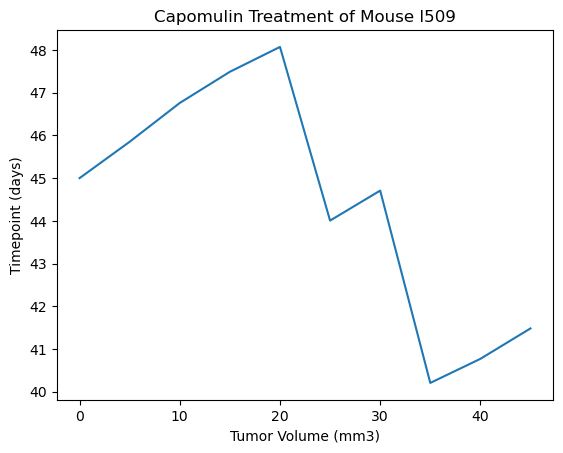

In [52]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
df_Capomulin=df.loc[df["Drug Regimen"]=="Capomulin"]
print(df_Capomulin)
df_mouse=df_Capomulin.loc[df_Capomulin["Mouse ID"]=="l509"]

plt.plot(df_mouse["Timepoint"],df_mouse["Tumor Volume (mm3)"])
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Timepoint (days)")
plt.title("Capomulin Treatment of Mouse l509")
plt.show()

C:\Users\tedta\AppData\Local\Temp\ipykernel_15132\3403228446.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mean=df_Capomulin.groupby("Mouse ID").mean()


,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.70,9.0,22.0
b742,22.5,40.083699,0.00,7.0,21.0
f966,10.0,36.505973,0.00,16.0,17.0
g288,22.5,41.990097,0.80,3.0,19.0
g316,22.5,44.613344,1.00,22.0,22.0
i557,22.5,44.805810,0.20,1.0,24.0
i738,22.5,39.141053,0.60,23.0,20.0
j119,22.5,44.465236,0.60,7.0,23.0
j246,17.5,43.216925,0.25,21.0,21.0


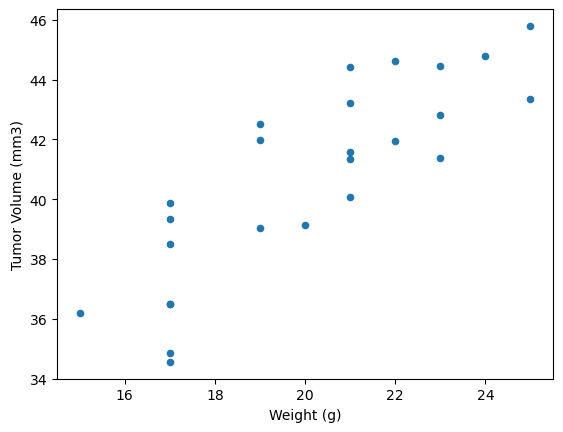

In [72]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
df_mean=df_Capomulin.groupby("Mouse ID").mean()


df_mean.plot(kind="scatter",x="Weight (g)",y="Tumor Volume (mm3)")
df_mean

## Correlation and Regression

The r-squared is: 0.7088568047708723


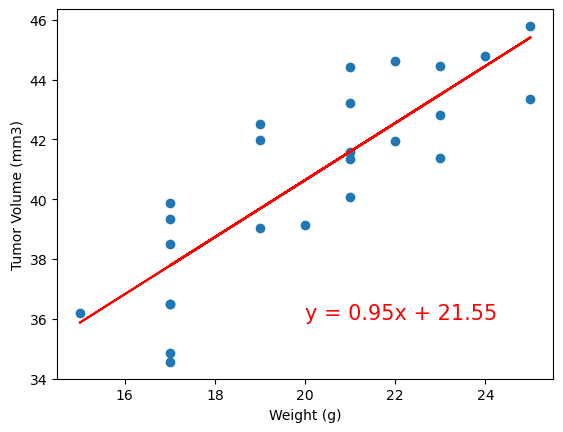

In [77]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = df_mean['Weight (g)']
y_values = df_mean['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

##### 